# Description:
India is one of the fastest-growing economies in the world. In the past decade we have seen a large number of unicorn startups rise in the Indian startup ecosystem which has a global impact.

In this notebook, we are going to perform EDA on the Indian startup funding dataset and also we will infer some insights and try to answer certain questions about the Indian startup ecosystem.

In [14]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Importing dataset
dataset = pd.read_csv(r"C:\Users\priya\Placements_Projects\Project 1\startup_funding.csv")

# Step 1: Understanding the dataset

In [16]:
# Preview dataset
dataset.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [17]:
# Dataset dimensions - (rows, columns)
dataset.shape

(3044, 10)

In [18]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [19]:
# Checking for Null values
(dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

Remarks              86.24 %
Amount in USD        31.54 %
SubVertical          30.75 %
City  Location        5.91 %
Industry Vertical     5.62 %
Investors Name        0.79 %
InvestmentnType       0.13 %
Sr No                  0.0 %
Date dd/mm/yyyy        0.0 %
Startup Name           0.0 %
dtype: object

Observations:
In the dependent feature i.e. 'Amount in USD' some preprocessing needs to be done like removing commas and dealing with null values.

The 'Date' feature needs to be preprocessed and converted to numeric so that it can be useful for creating plots.

The 'Remarks' feature contains about 86.23% of null values, so we can drop it.

# Step 2: Data Preprocessing

In [20]:
# Replacing the commas in 'Amount in USD' feature
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x: str(x).replace(',', ''))

In [21]:
# Fixing the faulty values in 'Amount in USD' feature
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("unknown", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("14342000+", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
dataset['Amount in USD'] = dataset['Amount in USD'].apply(lambda x : str(x).replace("nan", "0"))

In [22]:
# Converting to numeric data-type
dataset['Amount in USD'] = pd.to_numeric(dataset['Amount in USD'])

In [23]:
# Checking for most frequent values in 'Amount in USD'
dataset['Amount in USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

0.0           32.16 %
1000000.0      5.45 %
500000.0       3.55 %
2000000.0      2.27 %
3000000.0      2.17 %
5000000.0      2.17 %
10000000.0     1.97 %
100000.0       1.87 %
150000.0       1.48 %
200000.0       1.45 %
Name: Amount in USD, dtype: object

In [24]:
# Replacing 0 in 'Amount in USD' with null values
dataset['Amount in USD'] = dataset['Amount in USD'].replace(0, np.nan)

In [25]:
# Replacing null values with mean
dataset['Amount in USD'].fillna(dataset['Amount in USD'].mean(), inplace = True)

In [26]:
# Fixing the faulty values in 'Date' column
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '12/05.2015'] = '12/05/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '13/04.2015'] = '13/04/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '15/01.2015'] = '15/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '22/01//2015'] = '22/01/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '01/07/015'] = '01/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '05/072018'] = '05/07/2018'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\xc2\\xa010/7/2015'] = '10/07/2015'
dataset['Date dd/mm/yyyy'][dataset['Date dd/mm/yyyy'] == '\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [27]:
# Creating a feature 'Year Month' consisting of year and month
dataset['Year Month'] = (pd.to_datetime(dataset['Date dd/mm/yyyy']).dt.year*100) + (pd.to_datetime(dataset['Date dd/mm/yyyy']).dt.month)

In [28]:
# Dropping the 'Remarks' feature as it contains 86.24% null values
dataset.drop('Remarks', axis = 1, inplace = True)

In [29]:
# Replacing 'Bengaluru' with the more common name 'Bangalore' in the dataset
dataset['City  Location'][dataset['City  Location'] == 'Bengaluru'] = 'Bangalore'

In [30]:
# Replacing 'Undisclosed investors' with a common name 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
dataset['Investors Name'][dataset['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'

In [31]:
# Removing the space in 'Ola Cabs' as it gives two different words in WordCloud
dataset['Startup Name'][dataset['Startup Name'] == 'Ola Cabs'] = 'OlaCabs'

In [32]:
# Replacing with more common word
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed\\\\nFunding'] = 'Seed Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed / Angel Funding'
dataset['InvestmentnType'][dataset['InvestmentnType'] == 'Angel / Seed Funding'] = 'Seed / Angel Funding'

# Step 3: Exploratory Data Analysis

In [22]:
### Q1. How does the funding ecosystem change with time?

In [33]:
# Selecting the most frequent values in 'Year Month'
months = dataset['Year Month'].value_counts().head(20)

In [34]:
print('Average number of fundings each month are',months.values.mean())

Average number of fundings each month are 83.8


In [35]:
print('Minimum number of fundings made in a month are',months.values.min())

Minimum number of fundings made in a month are 70


In [36]:
print('Maximum number of fundings in a month are',months.values.max())

Maximum number of fundings in a month are 102


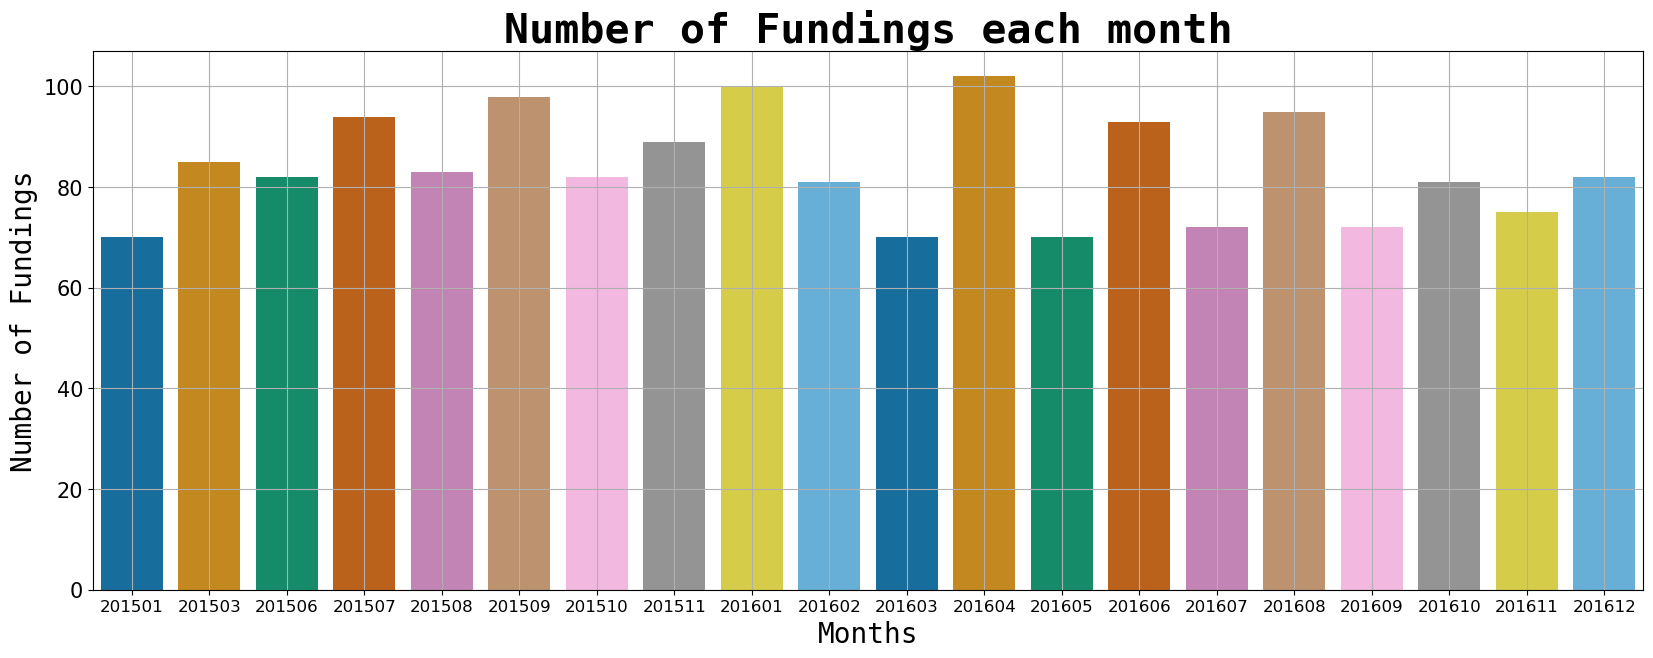

In [37]:
# Creating a barplot for Number of fundings made each month
plt.figure(figsize = (20, 7))
sns.barplot (x= months.index, y= months.values, palette = 'colorblind')
plt.title('Number of Fundings each month', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Months', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of Fundings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 15)
plt.grid()
plt.show()

In [ ]:
### Q2. Do cities play a major role in funding?

In [38]:
# Selecting top 10 cities 
cities = dataset['City  Location'].value_counts().head(10)

In [39]:
# Preview of frequencies of top 10 cities
cities.values

array([841, 567, 421, 287, 105,  99,  97,  92,  50,  38], dtype=int64)

In [40]:
# Preview of names of top 10 countries
cities.index

Index(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Hyderabad',
       'Chennai', 'Noida', 'Gurugram', 'Ahmedabad'],
      dtype='object')

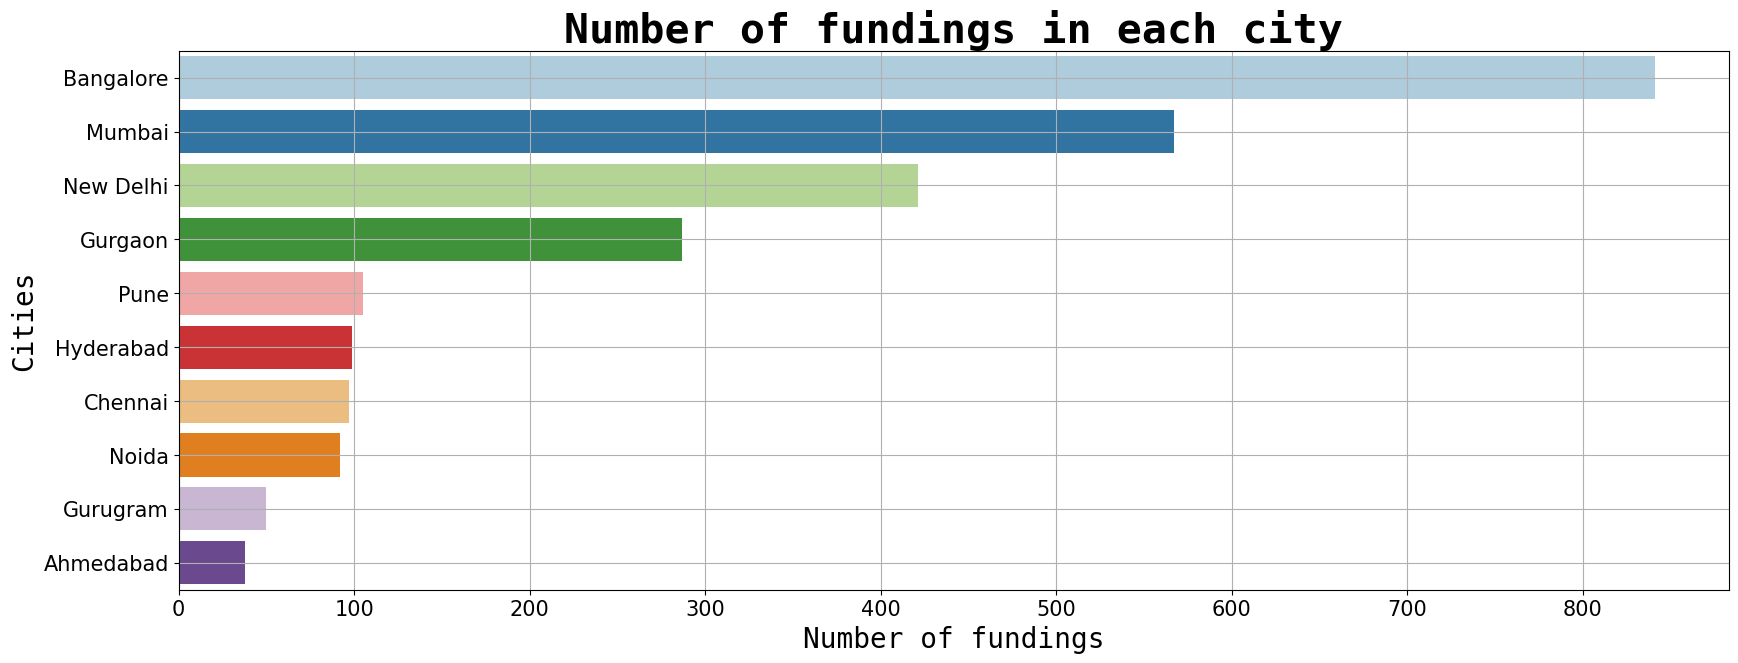

In [40]:
# Creating a barplot for number of fundings made in each city
plt.figure(figsize = (20, 7))
sns.barplot(x=cities.values, y=cities.index, palette = 'Paired')
plt.title('Number of fundings in each city', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Number of fundings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Cities', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.grid()
plt.show()

In [41]:
# Selecting the most frequent industries
industry = dataset['Industry Vertical'].value_counts().head(10)

In [42]:
# Preview of frequencies of top 10 industy types
industry.values

array([941, 478, 186,  70,  62,  61,  32,  29,  24,  23], dtype=int64)

In [45]:
# Prevew the names of top 10 industry types
industry.index

Index(['Consumer Internet', 'Technology', 'eCommerce', 'Healthcare', 'Finance',
       'ECommerce', 'Logistics', 'E-Commerce', 'Education', 'Food & Beverage'],
      dtype='object')

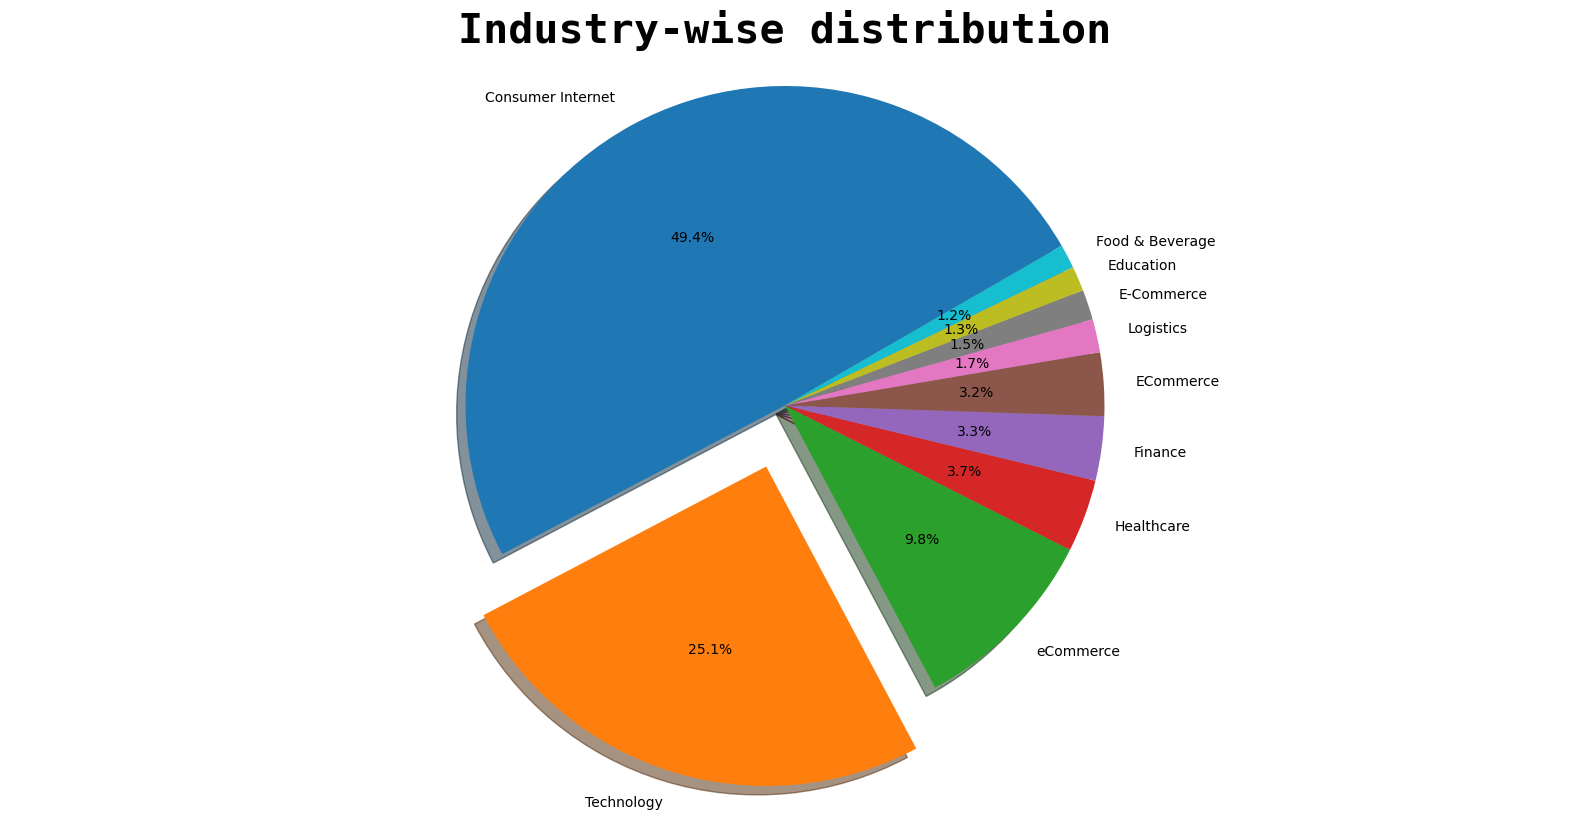

In [43]:
# Creating a pie chart of top 10 industries
plt.figure(figsize = (20, 10))
plt.pie(industry.values, labels = industry.index, startangle = 30, explode = (0 , 0.20, 0, 0, 0, 0, 0, 0, 0, 0), 
        shadow = True, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Industry-wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

In [44]:
# Selecting the most frequent subverticals
subvertical = dataset['SubVertical'].value_counts().head(10)

In [48]:
# Preview of frequencies of top 10 subverticals
subvertical.values

array([11, 10,  8,  5,  5,  5,  5,  5,  4,  4], dtype=int64)

In [45]:
# Preview of names of top 10 subverticals
subvertical.index

Index(['Online Lending Platform', 'Online Pharmacy', 'Food Delivery Platform',
       'Online Education Platform', 'Education', 'Online lending platform',
       'Online Learning Platform', 'Online Lending',
       'Non-Banking Financial Company', 'Online Food Delivery'],
      dtype='object')

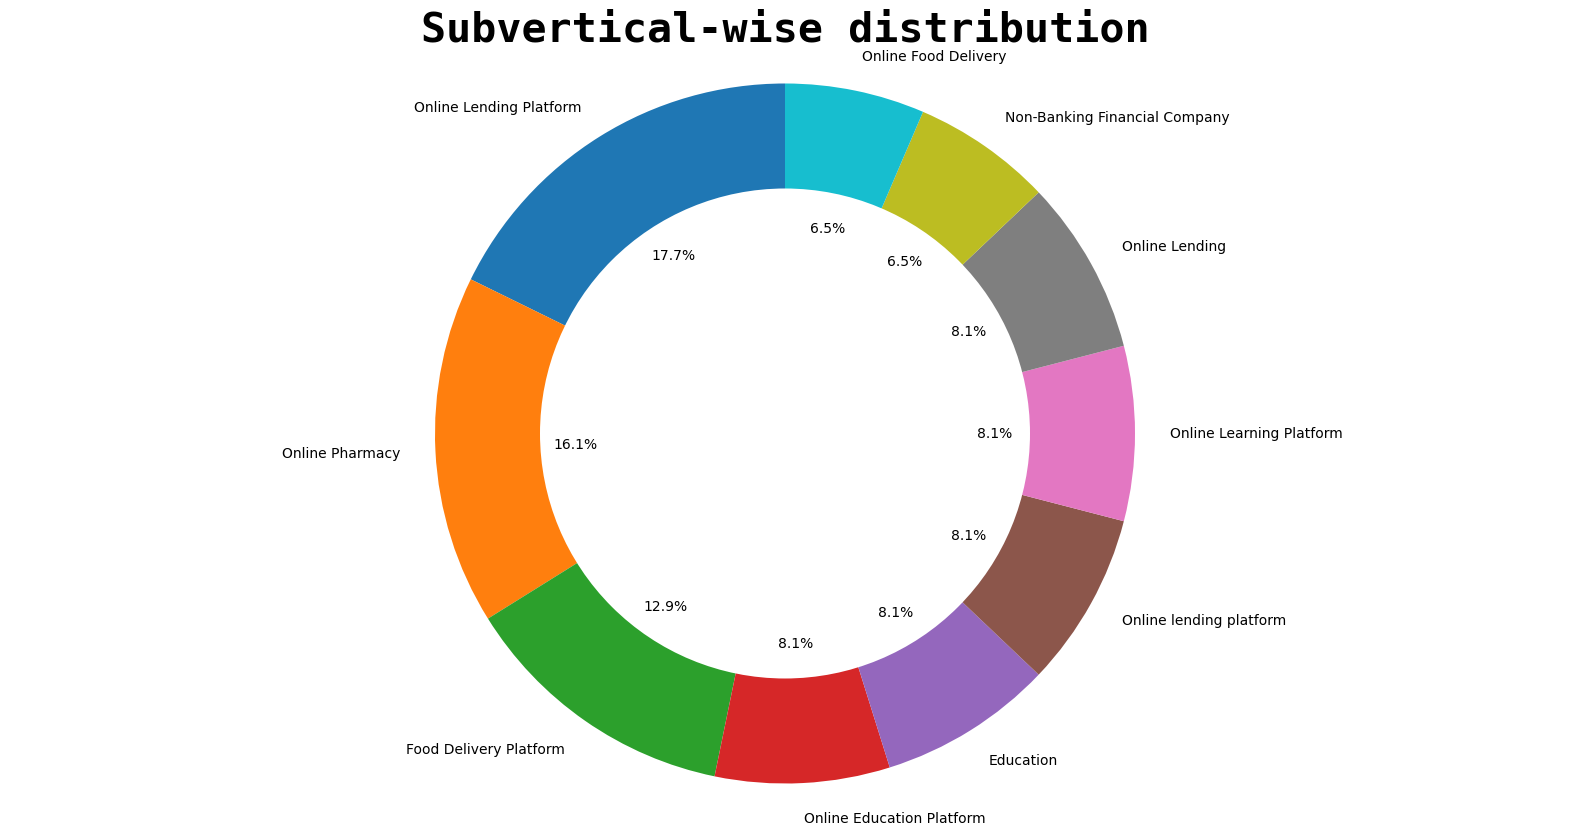

In [47]:
# Creating a donut chart of top 10 Subverticals
plt.figure(figsize = (20, 10))
y=subvertical.values
plt.pie(y, labels = subvertical.index, startangle = 90, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Subvertical-wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.show()

# Observations:
In the pie chart we can see that technology and consumer internet startups make up about 74% of the market.

Most of the startups like online pharmacy, online lending, food delivery platforms are technology-based as seen in the donut chart.

From the above graphs, we can say that consumer-based technology startups are favored by investors.

# Q4. Who are the most important investors in the Indian Ecosystem?

In [48]:
# Selecting the most frequent investors 
investors = dataset['Investors Name'].value_counts().head(10)

In [50]:
# Preview of frequency of top 10 investo
investors.values

array([103,  25,  23,  16,  15,  15,  12,  11,  11,  10], dtype=int64)

In [51]:
# Preview names of top 10 investors
investors.index 

Index(['Undisclosed Investors', 'Ratan Tata', 'Indian Angel Network',
       'Kalaari Capital', 'Group of Angel Investors', 'Sequoia Capital',
       'Accel Partners', 'Venture Catalysts', 'Brand Capital',
       'RoundGlass Partners'],
      dtype='object')

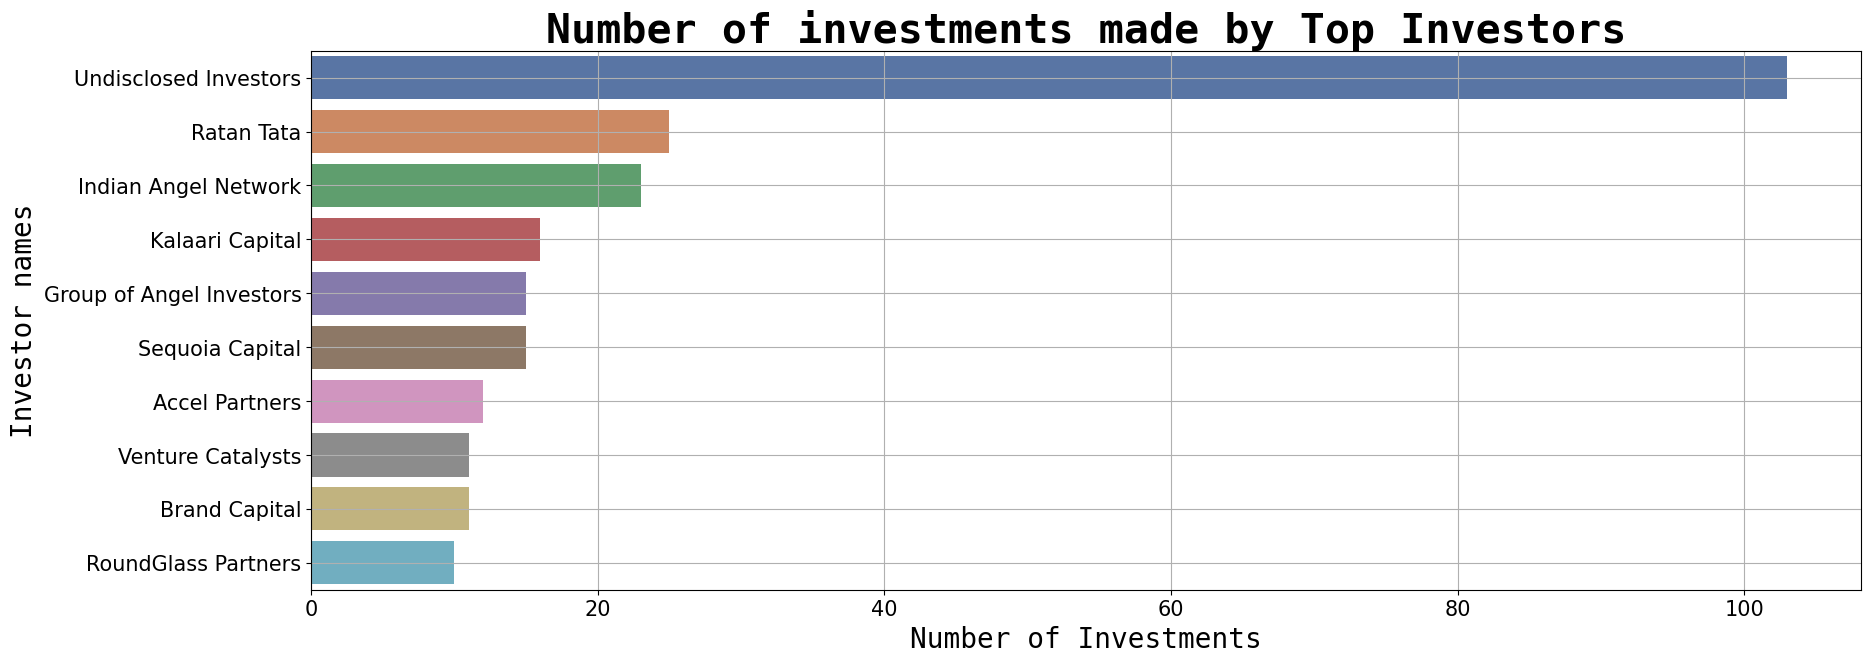

In [53]:
plt.figure(figsize = (20, 7))
sns.barplot(x=investors.values, y=investors.index, palette = 'deep')
plt.title('Number of investments made by Top Investors', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Number of Investments', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Investor names', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.grid()
plt.show()

# Observations:
The top investor in the above graph is undisclosed, this is because in many startups investors choose to remain hidden.

The known top investors in the Indian startup ecosystem are Ratan Tata, Indian Angel Network, and Kalaari Capital.

In [54]:
# Preview of top 10 most funded startups cevgo
dataset['Amount in USD'].sort_values(ascending = False).head(10)

60      3.900000e+09
651     2.500000e+09
966     1.400000e+09
830     1.400000e+09
31      1.000000e+09
2648    7.000000e+08
2459    6.800000e+08
188     6.000000e+08
33      5.850000e+08
2244    5.000000e+08
Name: Amount in USD, dtype: float64

In [55]:
# Preview of details of top 10 most funded startups
dataset.sort_values(by = 'Amount in USD', ascending = False).head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year Month
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,3.900000e+09,201908
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201711
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
2648,2649,28/07/2015,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,7.000000e+08,201507
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
188,189,30/08/2018,True North,Finance,Private Equity Firm,Mumbai,NaN,Private Equity,6.000000e+08,201808
33,34,02/10/2019,Udaan,B2B,Business development,Bangalore,"Altimeter Capital, DST Global",Series D,5.850000e+08,201902
2244,2245,18/11/2015,Ola,Car Aggregator & Retail Mobile App,NaN,Bangalore,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",Private Equity,5.000000e+08,201511


# Observations:
The highest funded startups are 'Rapido Bike taxi', 'Paytm', and 'Flipkart'.

The average funding in the Indian startup ecosystem is 18429897 USD.

The lowest-funded startups are 'Hostel Dunia', 'Play your sport', and 'Yo Grad' with about 16000 USD each.

In [57]:
# Selecting the startups funded the most number of times
most_funded = dataset['Startup Name'].value_counts().head(20)

In [58]:
# Preview frequencies
most_funded.values

array([8, 8, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4],
      dtype=int64)

In [59]:
# Preview index
most_funded.index

Index(['OlaCabs', 'Swiggy', 'Paytm', 'Meesho', 'Nykaa', 'NoBroker', 'Medinfi',
       'UrbanClap', 'Flipkart', 'Grofers', 'Uniphore', 'Capital Float',
       'Moglix', 'Toppr', 'Jugnoo', 'Icertis', 'Wooplr', 'HolaChef', 'Niki.ai',
       'Coverfox'],
      dtype='object')

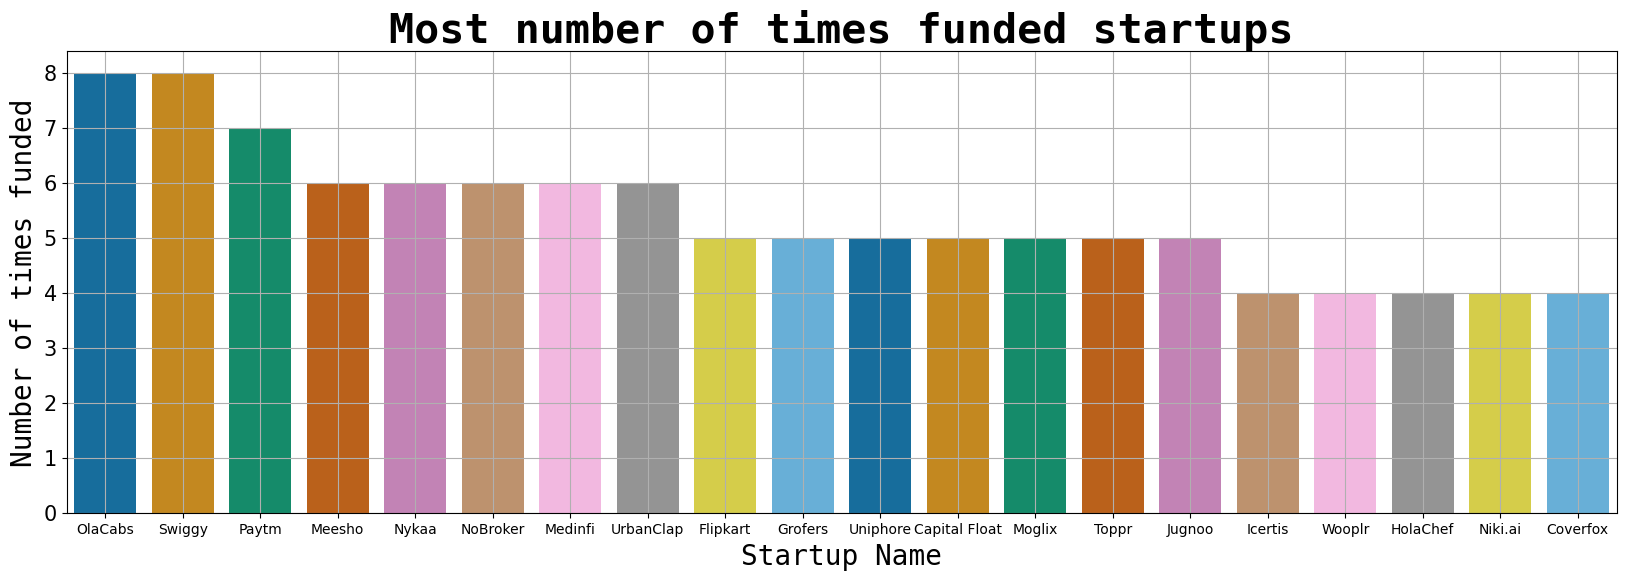

In [60]:
# Creating a barplot of startups funded most number of times
plt.figure(figsize = (20, 6))
sns.barplot(x= most_funded.index,y= most_funded.values, palette = 'colorblind')
plt.title('Most number of times funded startups', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Startup Name', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of times funded', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 15)
plt.grid()
plt.show()

In [67]:
from wordcloud import WordCloud, STOPWORDS

In [68]:
most_funded_1 = dataset['Startup Name'].value_counts().head(30)

In [69]:
names = most_funded_1.index

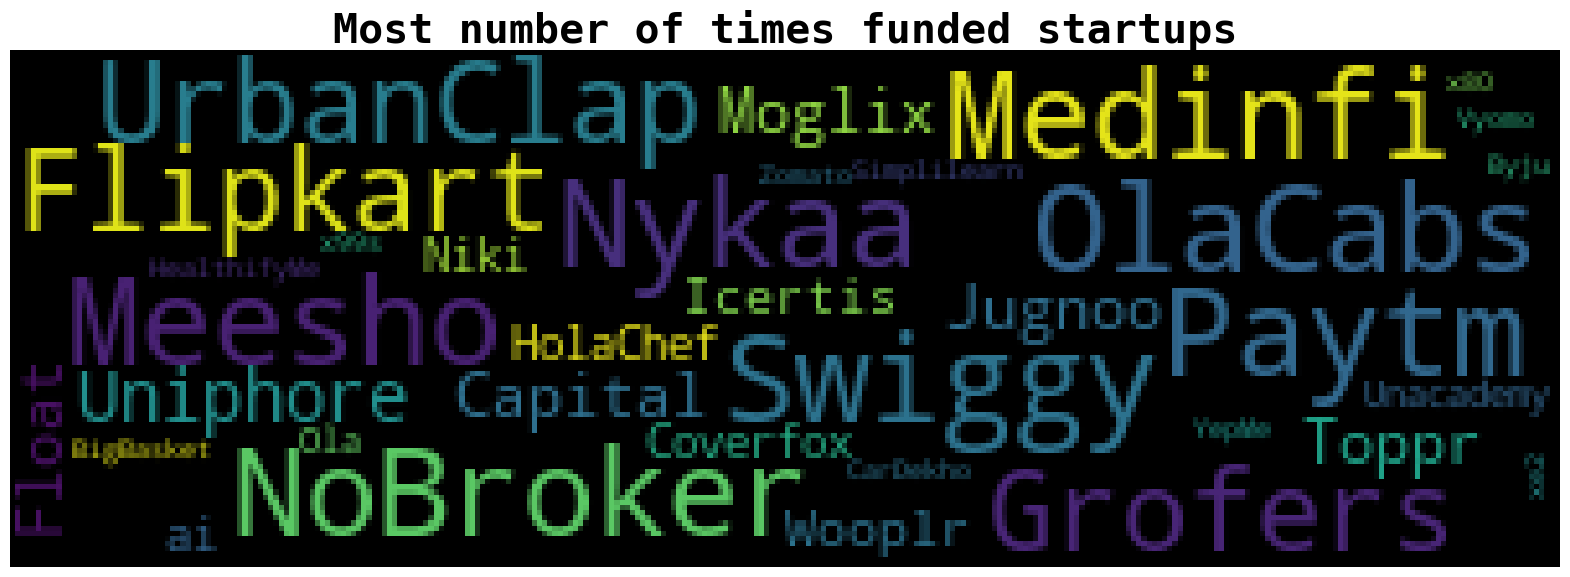

In [70]:
# Creating a wordcloud of startup names
plt.figure(figsize = (20, 7))
wordcloud = WordCloud(max_font_size = 25, width = 300, height = 100).generate(' '.join(names))
plt.title('Most number of times funded startups', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

# Observations:
The statups funded the most number of times are 'Swiggy', 'OlaCabs' and 'Paytm'.


In [63]:
# Preview of types of investments sorted by frequency
dataset['InvestmentnType'].value_counts().head(10)

Seed Funding            1385
Private Equity          1356
Seed / Angel Funding     138
Debt Funding              25
Series A                  24
Series B                  20
Series C                  14
Series D                  12
Seed Round                 7
Pre-Series A               4
Name: InvestmentnType, dtype: int64

In [64]:
# Selecting 10 most common investment types
investment_type = dataset['InvestmentnType'].value_counts().head(10)

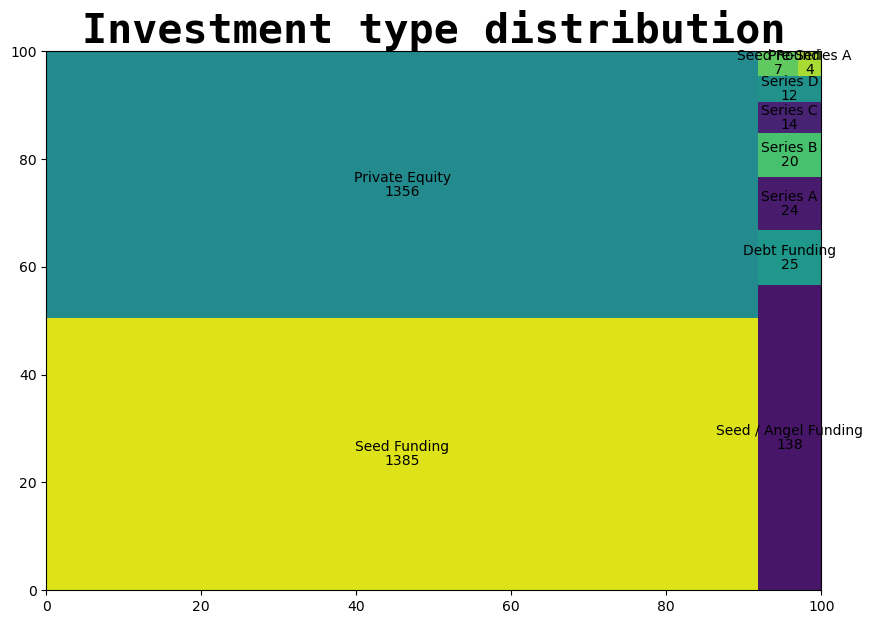

In [66]:
# Creating a Treemap of Investment types
import squarify
plt.figure(figsize = (10, 7))
squarify.plot(sizes = investment_type.values, label = investment_type.index, value = investment_type.values)
plt.title('Investment type distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

# Observations:
The major types of investments are Private Equity and Seed Funding which account for more than 90% of fundings.

Other types of fundings are Debt funding, Seed/Angel funding, Series A, Series B, Series C but they are very rare.

# Conclusion:
Technology-based startups which provide their services to the everyday consumer are very probable to get a lot of funding. We have seen such startups like Flipkart and Paytm.

A large number of Startups based in metropolitan cities like Bangalore and Mumbai are funded, which may be due to the fact that talent availability is massive in those cities.

Most of the fundings are either of Private Equity and Seed Funding type.

Ratan Tata, Indian Angel Network, and Kalaari Capital are some of the top investors in the Indian startup ecosystem.

Flipkart, Paytm and Rapido Bike taxi are one of the most funded startups whereas Ola Cabs and Swiggy were funded the most number of times.